In [23]:
from autocluster import AutoCluster
from sklearn import datasets
from collections import Counter
from utils.metafeatures import MetafeatureMapper
from sklearn.metrics.cluster import v_measure_score
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
df = pd.DataFrame(datasets.load_digits()['data'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [26]:
cluster = AutoCluster()
fit_params = {
    "df": df, 
    "cluster_alg_ls": ['MiniBatchKMeans', 'KMeans'],
    "dim_reduction_alg_ls": ['PCA', 'TSNE', 'FastICA'],
    "n_evaluations": 20,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 50,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "warmstart": True,
    "general_metafeatures": MetafeatureMapper.getGeneralMetafeatures(),
    "numeric_metafeatures": MetafeatureMapper.getNumericMetafeatures(),
    "categorical_metafeatures": [],
}
result_dict = cluster.fit(**fit_params)

1315/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {MiniBatchKMeans, KMeans}, Default: MiniBatchKMeans
    dim_reduction_choice, Type: Categorical, Choices: {PCA, TSNE, FastICA}, Default: PCA
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    fun___FastICA, Type: Categorical, Choices: {logcosh, exp, cube}, Default: logcosh
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 30], Default: 5
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 30], Default: 10
    n_components___FastICA, Type: Ordinal, Sequence: {2, 3}, Default: 2
    n_components___PCA, Type: Ordinal, Sequence: {2, 3}, Default: 2
    n_components___TSNE, Type: Ordinal, Sequence: {2}, De

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_

{'run_obj': 'quality', 'output_dir': 'log//smac-2019-07-26_00-04-24-71922', 'abort_on_first_run_crash': False, 'deterministic': 'true', 'cutoff_time': 50, 'runcount-limit': 20, 'cs': Configuration space object:
  Hyperparameters:
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {MiniBatchKMeans, KMeans}, Default: MiniBatchKMeans
    dim_reduction_choice, Type: Categorical, Choices: {PCA, TSNE, FastICA}, Default: PCA
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    fun___FastICA, Type: Categorical, Choices: {logcosh, exp, cube}, Default: logcosh
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 30], Default: 5
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 30], Default: 10
    n_components___FastICA, Type: Ordinal, Sequence: {2, 3}, Defaul

Fitting configuration: 
{'svd_solver___PCA': 'randomized', 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 55, 'n_clusters___MiniBatchKMeans': 12, 'n_components___PCA': 3, 'dim_reduction_choice': 'PCA', 'whiten___PCA': True}
Score obtained by this configuration: -0.33996998317862664
Fitting configuration: 
{'svd_solver___PCA': 'arpack', 'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 957, 'n_clusters___MiniBatchKMeans': 20, 'n_components___PCA': 3, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: -0.2964408157287592
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'early_exaggeration___TSNE': 6.086069114395818, 'batch_size___MiniBatchKMeans': 953, 'n_clusters___MiniBatchKMeans': 11, 'dim_reduction_choice': 'TSNE', 'n_components___TSNE': 2, 'perplexity___TSNE': 60.50509106016471}
Score obtained by this configuration: -0.4737038016319275
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'ea

In [27]:
result_dict['metafeatures'][0]

array([ 0.00000000e+00,  0.00000000e+00,  1.31500000e+03,  7.18159194e+00,
        4.90090304e-01,  9.26501037e-01,  1.31000076e+03,  3.62215511e+01,
        2.22475852e-01, -5.28506404e-01,  1.32314095e-01, -1.45814594e+00,
        5.31696807e-03,  5.43867481e+01, -3.08324441e-01, -2.04179766e+01,
       -1.42926064e+00, -7.85964641e-01,  4.90090304e-01, -1.07484849e-01,
       -1.37976881e-02,  2.68620469e+00,  7.74445314e-02,  0.00000000e+00,
        4.09260611e+00, -7.55841062e-01, -3.00000000e+00,  4.32109392e+01,
        3.00244483e-01,  5.20165750e-02,  2.03332627e+00,  4.37500000e-01,
       -6.36049569e-01])

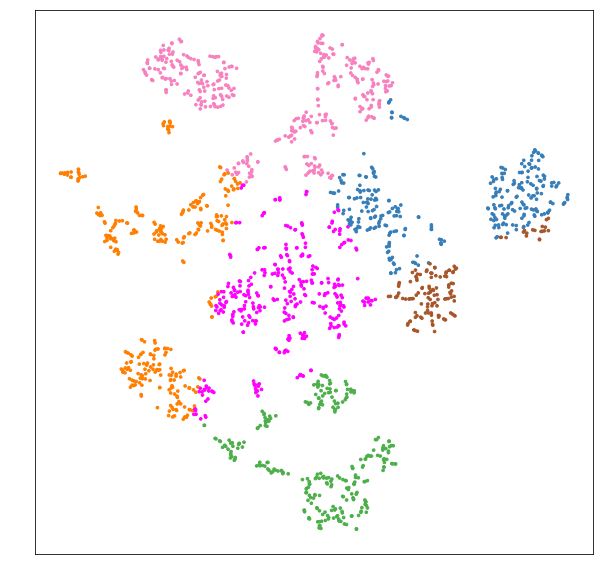

In [28]:
predictions = cluster.predict(df)

In [29]:
Counter(predictions)

Counter({0: 316, 1: 330, 2: 280, 3: 357, 4: 382, 5: 132})

In [30]:
v_measure_score(predictions, datasets.load_digits()['target'])

0.560357999138326